<a href="https://colab.research.google.com/github/John-G-Thomas/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv', na_values=' ?')

print(df.shape)
df.head(15)

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent
5,179,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,9-11 years,9-11 years,72469.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Immediately after graduating,Java;JavaScript;Lua;PHP;Python;Kotlin;HTML;CSS...,Male,25 - 34 years old,White or of European descent
6,241,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer,3-5 years,3-5 years,33528.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C++;Python;Bash/Shell,Male,25 - 34 years old,White or of European descent
7,286,No,Employed full-time,"A humanities discipline (ex. literature, histo...","Back-end developer;C-suite executive (CEO, CTO...",18-20 years,15-17 years,83342.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Six months to a year,C#;JavaScript;SQL;HTML;CSS,Male,35 - 44 years old,White or of European descent
8,300,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer;Full-stack developer,3-5 years,0-2 years,72500.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,Java;JavaScript;Perl;PHP;Python;Ruby;SQL;HTML;...,Male,25 - 34 years old,White or of European descent
9,324,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Mobile developer,18-20 years,9-11 years,126403.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,Java;Python;Bash/Shell,Male,35 - 44 years old,East Asian


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sam1 = df.sample(20, random_state=42)
sam2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

- Sample 1

In [0]:
sam1['ConvertedSalary'].mean()

55752.2

-  Sample 2

In [0]:
sam2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

- I would defintly trust the sample 2 alot more due to the larger size of 200 instead of 20. They would'nt know because they would'nt understand that these have different sizes and probably assum the smaller mean of Sample 1.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

- Yes, I can assum theres a large sampling error and standard diviation for sample 1 because its only 20 0f 2761 population.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



- To add confidence intervials (CI), this allows non-technical readers to see how confident that the values represent at least a certain percentage of the main population. In addition, you could add the sampling error to farther explain the sample preciseness.



## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [0]:
def CI(data, confidence=.95):
  sample = pd.Series(data)
  x_bar = sample.mean()
  s = sample.std()
  n= len(sample)
  t = stats.t.ppf((1+confidence) / 2, n-1)
  std_error = s/np.sqrt(n)
  moe = std_error * t
  upper = x_bar+ moe
  lower = x_bar - moe
  return(lower, x_bar, upper)

In [0]:
CI1 = CI(sam1['ConvertedSalary'])
CI1

(35805.10309625536, 55752.2, 75699.29690374463)

In [0]:
CI2 = CI(sam2['ConvertedSalary'])
CI2

(60593.058804479086, 68551.255, 76509.45119552092)

**2) Which confidence interval is wider and why?**

- The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [0]:
print("Bootcampers Converted Salary Estimate 1")
print("Mean:", CI1[1])
print("MOE:", CI1[2]-CI1[1])

Bootcampers Converted Salary Estimate 1
Mean: 55752.2
MOE: 19947.096903744634


In [0]:
print("Bootcampers Converted Salary Estimate 2")
print("Mean:", CI2[1])
print("MOE:", CI2[2]-CI2[1])

Bootcampers Converted Salary Estimate 2
Mean: 68551.255
MOE: 7958.196195520912


- The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

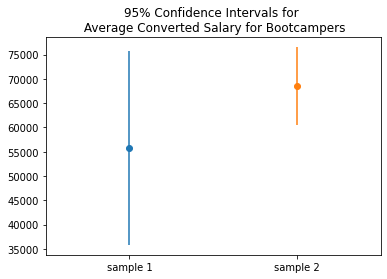

In [0]:
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% Confidence Intervals for \n Average Converted Salary for Bootcampers')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

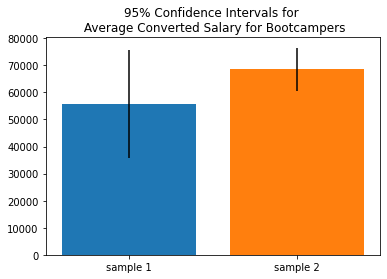

In [0]:
plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]))
plt.bar(x=1, height=CI2[1], yerr=(CI2[2]-CI2[1]))
plt.title('95% Confidence Intervals for \n Average Converted Salary for Bootcampers')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [0]:
CI3 = CI(df['ConvertedSalary'])
CI3

(71299.82986224786, 73453.40420137631, 75606.97854050476)

In [0]:
print("Bootcampers Converted Salary")
print("Mean:", CI3[1])
print("MOE:", CI3[2]-CI3[1])

Bootcampers Converted Salary
Mean: 73453.40420137631
MOE: 2153.5743391284486


- From the Entire Dataset and not estimating you get a mean of error of "2153.57". Which is around 5000 dollars more precise then the estimates.***

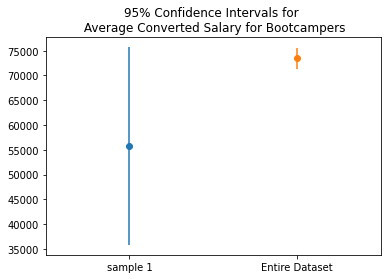

In [0]:
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI3[1], yerr=(CI3[2]-CI3[1]), fmt='o')
plt.title('95% Confidence Intervals for \n Average Converted Salary for Bootcampers')
plt.xticks(ticks=[0,1], labels=['sample 1',"Entire Dataset"])
plt.xlim(-.5, 1.5)
plt.show()

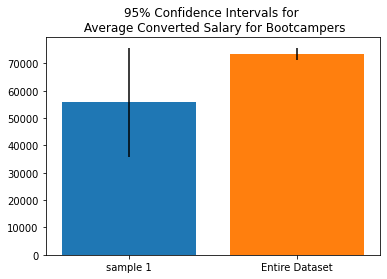

In [0]:
plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]))
plt.bar(x=1, height=CI3[1], yerr=(CI3[2]-CI3[1]))
plt.title('95% Confidence Intervals for \n Average Converted Salary for Bootcampers')
plt.xticks(ticks=[0,1], labels=['sample 1', 'Entire Dataset'])
plt.xlim(-.5, 1.5)
plt.show()

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

- Precision is based off of the margin or error(MOE) in the content of statistical estimates. Precision is how closily dense the set of values(each values) compared to accuracy is closeness to the measurement or specific value.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

- The Confidence Interval (CI) is a estamate of the possible outcomes of the mean of the population. In addition, the upper and lower values vary from sample size.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

##1) Study the relationship between t-tests and confidence intervals.

###Sample mean 95% confidence lower and upper

In [0]:
CI(sam2['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092)

In [0]:
print("Bootcampers Converted Salary Estimate 2")
print("Mean:", CI2[1])
print("MOE:", CI2[2]-CI2[1])

Bootcampers Converted Salary Estimate 2
Mean: 68551.255
MOE: 7958.196195520912


###Upper Bound

In [0]:
# Outside

In [0]:
stats.ttest_1samp(sam2['ConvertedSalary'], 76509.45119552092)

Ttest_1sampResult(statistic=-1.9719565442493936, pvalue=0.05000000000027153)

In [0]:
# Inside

In [0]:
stats.ttest_1samp(sam2['ConvertedSalary'], 76509.45119552092)

Ttest_1sampResult(statistic=-1.9719565442493936, pvalue=0.05000000000027153)

###Lower Bound

In [0]:
# Outsied

In [0]:
stats.ttest_1samp(sam2['ConvertedSalary'], 60593.058804479086)

Ttest_1sampResult(statistic=1.9719565442493954, pvalue=0.050000000000271334)

In [0]:
# Inside

In [0]:
stats.ttest_1samp(sam2['ConvertedSalary'], 60593.058804479086)

Ttest_1sampResult(statistic=1.9719565442493954, pvalue=0.050000000000271334)

- What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?

In [0]:
# It means we have a high confidence percentage in confience interval and the correct Margin of Error(MOE).

##2) Go back to our congressional voting dataset and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph.

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-06-11 15:16:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-06-11 15:16:18 (278 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
column_headerss = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

dff = pd.read_csv('house-votes-84.data', names=column_headerss)

print(dff.shape)
dff.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
dff = dff.replace({'y': 1, 'n': 0, '?':np.NaN})

dff.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dff['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
dem = dff[dff['party'] == 'democrat']
rep = dff[dff['party'] == 'republican']

In [0]:
dem

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
426,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
428,democrat,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
429,democrat,1.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0


In [0]:
column_headerss

['party',
 'handicapped-infants',
 'water-project',
 'budget',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups',
 'anti-satellite-ban',
 'aid-to-contras',
 'mx-missile',
 'immigration',
 'synfuels',
 'education',
 'right-to-sue',
 'crime',
 'duty-free',
 'south-africa']

In [0]:
def CI(data, confidence=.95):
  sample = pd.Series(data)
  x_bar = sample.mean()
  s = sample.std()
  n= len(sample)
  t = stats.t.ppf((1+confidence) / 2, n-1)
  std_error = s/np.sqrt(n)
  moe = std_error * t
  upper = x_bar+ moe
  lower = x_bar - moe
  return(lower, x_bar, upper)

cii = []
for column in column_headerss:
  confidence = CI(dem[column])
  ci1.append(list(confidence), nan_policy='omit')
cii

TypeError: ignored

##3) Dive deeper into the 2018 Stack Overflow Survey results to see what cool things you can find.

In [0]:
df.head(10)

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent
5,179,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,9-11 years,9-11 years,72469.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Immediately after graduating,Java;JavaScript;Lua;PHP;Python;Kotlin;HTML;CSS...,Male,25 - 34 years old,White or of European descent
6,241,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer,3-5 years,3-5 years,33528.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C++;Python;Bash/Shell,Male,25 - 34 years old,White or of European descent
7,286,No,Employed full-time,"A humanities discipline (ex. literature, histo...","Back-end developer;C-suite executive (CEO, CTO...",18-20 years,15-17 years,83342.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Six months to a year,C#;JavaScript;SQL;HTML;CSS,Male,35 - 44 years old,White or of European descent
8,300,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer;Full-stack developer,3-5 years,0-2 years,72500.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,Java;JavaScript;Perl;PHP;Python;Ruby;SQL;HTML;...,Male,25 - 34 years old,White or of European descent
9,324,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Mobile developer,18-20 years,9-11 years,126403.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,Java;Python;Bash/Shell,Male,35 - 44 years old,East Asian
